# Proyek Analisis Data: Customer
- **Nama:** Nabila Syaida Ramdani
- **Email:** nabila87611@gmail.com
- **ID Dicoding:** NabilaSyaida

## Menentukan Pertanyaan Bisnis

- Kota mana yang memiliki jumlah pelanggan terbanyak berdasarkan (customer_city)?
- Dapatkah kita membuat grafik untuk menunjukkan jumlah pelanggan di setiap kota (customer city) dan negara bagian (customer_state)?

## Import Semua Packages/Library yang Digunakan

In [1]:
pip install scipy

In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

In [3]:
data = pd.read_csv("customer.csv", delimiter=",")
data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


### Gathering Data

In [4]:
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
data.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**
- Data diambil melalui platform kaggle https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
- Terdapat 99441 baris dengan 5 kolom dan terdapat beberapa tipe dalam data tersebut diantaranya object dan integer.

### Assessing Data

In [6]:
data.nunique()

,0
customer_id,99441
customer_unique_id,96096
customer_zip_code_prefix,14994
customer_city,4119
customer_state,27


In [7]:
data.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


**Insight:**
- Tidak adanya data yang null(kosong) , berarti data tersebut lengkap dan tidak adanya nilai yang hilang, dan tidak diperlukan teknik untuk mengatasi missing value.
- Dapat dilihat pada output di atas pada kolom customer_id 0 menunjukkan tidak adanya data yang hilang, dan seterusnya pada semua kolom

### Cleaning Data

In [8]:
data.duplicated().sum()

0

**Insight:**
- Menunjukkan tidak adanya data yang duplikat.

## Exploratory Data Analysis (EDA)

In [9]:
data.describe(include = "all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


**Insight:**
- Dapat dilihat konsentrasi pelanggan, banyak yang berasal dari kota Sao Paulo dan negara bagian SP.
- Sao Paulo adalah negara bagian yang memiliki frekuensi tertinggi, dengan 41476 pelanggan dapat dilihat pada customer_state.

In [10]:
city = data.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)
city

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


**Insight:**
- Dapat dilihat kolom pertama menunjukkan nama kota (customer_city) dan kolom kedua menunjukkan jumlah pelanggan dari masing-masing kota (customer_state)

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Kota mana yang memiliki pelanggan terbanyak?

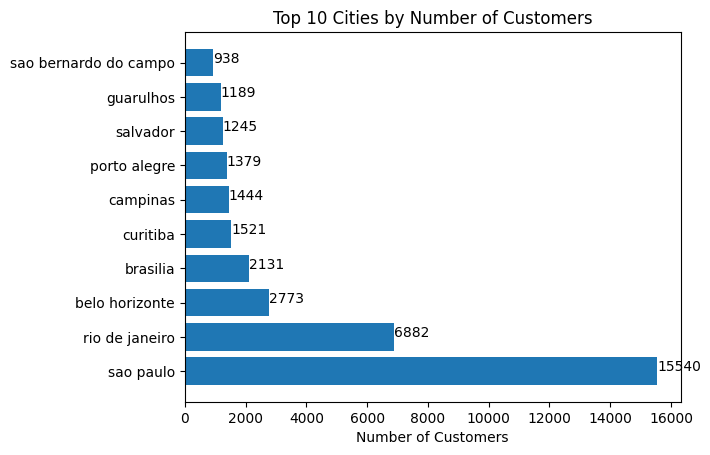

In [11]:
city_counts = data["customer_city"].value_counts().head(10)  # 10 kota teratas
plt.barh(city_counts.index, city_counts.values)
plt.xlabel("Number of Customers")
plt.title("Top 10 Cities by Number of Customers")

for index, value in enumerate(city_counts.values):
  plt.text(value, index, str(value))
plt.show()

- Dapat dilihat dari bar chart di atas menunjukkan bahwa pelanggan terbanyak adalah kota Sao Paulo dengan 15540 pelanggan.

### Pertanyaan 2:

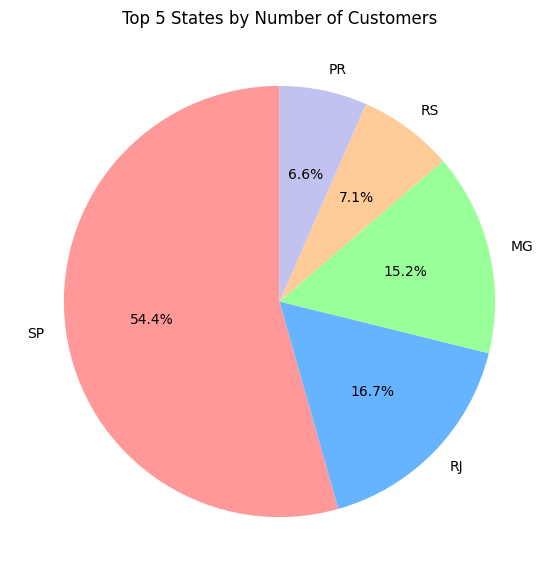

In [12]:

state_counts = data["customer_state"].value_counts().head(5)
plt.figure(figsize=(7, 7))
plt.pie(state_counts.values, labels=state_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])

plt.title("Top 5 States by Number of Customers")
plt.show()


 **Insight:**
- Negara Sao Paulo dengan jumlah pelanggan terbanyak mencakup 54.4% dari total pelanggan, negara bagian kedua terbanyak yaitu Rio de Janeiro dengan nilai 16.7%, negara ketiga terbanyak yaitu MG (Minas Gerais) dengan nilai 15.2%.

## Analisis Lanjutan (Opsional)

In [30]:
unique_cities = set(data["customer_city"])
print(unique_cities)


{'santa rita de minas', 'monte santo de minas', 'pedrinhas paulista', 'itaara', 'tumiritinga', 'itutinga', 'sao joao do itaperiu', 'balsa nova', 'janiopolis', 'tiangua', 'ibitinga', 'ribeirao das neves', 'sao benedito do sul', 'mafra', 'ladainha', 'gramado dos loureiros', 'medianeira', 'ametista do sul', 'biritinga', 'teixeiras', 'itarantim', 'uba', 'nova olinda', 'paraopeba', 'verissimo', 'jequeri', 'potiragua', 'crissiumal', 'itaquirai', 'sales oliveira', 'guaranta do norte', 'lagoa dourada', 'crato', 'sumidouro', 'corguinho', 'tocos do moji', 'vazante', 'jose da penha', 'pelotas', 'agrolandia', 'seara', 'aguas de sao pedro', 'itapage', 'ariquemes', 'rondonopolis', 'ipumirim', 'nova ubirata', 'sao jose do norte', 'ibira', 'campo florido', 'tenente ananias', 'pirapemas', 'sangao', 'reserva do cabacal', 'maioba', 'avanhandava', 'piracuruca', 'conceicao do para', 'angelina', 'sao luis do curu', 'novo progresso', 'barra do rio azul', 'tabuleiro do norte', 'floresta', 'riachinho', 'varzea

In [14]:
unique_state = set(data["customer_state"])
print(unique_state)

{'MA', 'PA', 'PR', 'ES', 'RR', 'GO', 'MG', 'RS', 'AC', 'PE', 'SC', 'MT', 'RO', 'TO', 'AM', 'AP', 'RJ', 'PI', 'MS', 'DF', 'BA', 'RN', 'CE', 'SE', 'AL', 'SP', 'PB'}


## Conclusion

- Dari data customer yang berisi 99441 baris dengan 5 kolom, dapat dilihat terdapat 5 kota diantaranya sao bernardo do campo, franca, sao paulo, mogi das cruzes, dan campinas. Kota yang memiliki pelanggan terbanyak yaitu kota Sao Paulo yaitu sebanyak 15540 pelanggan.
- Kita dapat menggunakan bar chart untuk memvisualisasikan 10 kota yang memiliki customer terbanyak.

In [26]:
rfm_df = data.groupby(by="customer_id", as_index=False).agg({
    "customer_id": "max",
    "customer_city": "nunique",
    "customer_state": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "monetary"]

rfm_df["max_order_timestamp"] = pd.to_datetime(rfm_df["max_order_timestamp"], errors='coerce')
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,monetary
0,00012a2ce6f8dcda20d059ce98491703,SP
1,000161a058600d5901f007fab4c27140,MG
2,0001fd6190edaaf884bcaf3d49edf079,ES
3,0002414f95344307404f0ace7a26f1d5,MG
4,000379cdec625522490c315e70c7a9fb,SP


In [29]:
data.to_csv("all_data.csv", index=False)